**Nama  : Muhammad Rafif Musyaffa** <br>
**Nim   : 211351097** <br>
**Kelas : Pagi A**

# Mengambil dataset dari kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rafifmusyaffa","key":"ba27a8f755786e75aead78a7b89838bb"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d goyaladi/customer-spending-dataset

  0% 0.00/23.3k [00:00<?, ?B/s]
100% 23.3k/23.3k [00:00<00:00, 17.3MB/s]


In [4]:
!mkdir customer_dataset
!unzip customer-spending-dataset.zip -d customer_dataset

Archive:  customer-spending-dataset.zip
  inflating: customer_dataset/customer_data.csv  


# Library yang dibutuhkan

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px

In [6]:
df = pd.read_csv('customer_dataset/customer_data.csv')

# Data Discovery

In [7]:
df.head()

,name,age,gender,education,income,country,purchase_frequency,spending
0,Teresa Williams MD,42,Female,High School,53936,Slovenia,0.9,13227.120
1,Christine Myers,49,Female,Master,82468,Aruba,0.6,12674.040
2,Dwayne Moreno,55,Male,Bachelor,56941,Cyprus,0.3,5354.115
3,Amy Norton,24,Female,Bachelor,60651,Palau,0.2,2606.510
4,Tonya Adams,64,Male,Master,81884,Zambia,0.9,18984.780


In [8]:
df.describe()

,age,income,purchase_frequency,spending
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.754000,59277.852000,0.554600,9613.296835
std,13.778582,23258.377128,0.284675,5484.707210
min,18.000000,20031.000000,0.100000,611.985000
25%,30.000000,38825.500000,0.300000,5020.425000
50%,42.000000,58972.000000,0.600000,9430.395000
75%,54.000000,79114.000000,0.800000,13645.507500
max,65.000000,99780.000000,1.000000,25546.500000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                1000 non-null   object 
 1   age                 1000 non-null   int64  
 2   gender              1000 non-null   object 
 3   education           1000 non-null   object 
 4   income              1000 non-null   int64  
 5   country             1000 non-null   object 
 6   purchase_frequency  1000 non-null   float64
 7   spending            1000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [10]:
df.dtypes

name                   object
age                     int64
gender                 object
education              object
income                  int64
country                object
purchase_frequency    float64
spending              float64
dtype: object

In [11]:
df.isna().sum()

name                  0
age                   0
gender                0
education             0
income                0
country               0
purchase_frequency    0
spending              0
dtype: int64

# EDA

<Axes: >

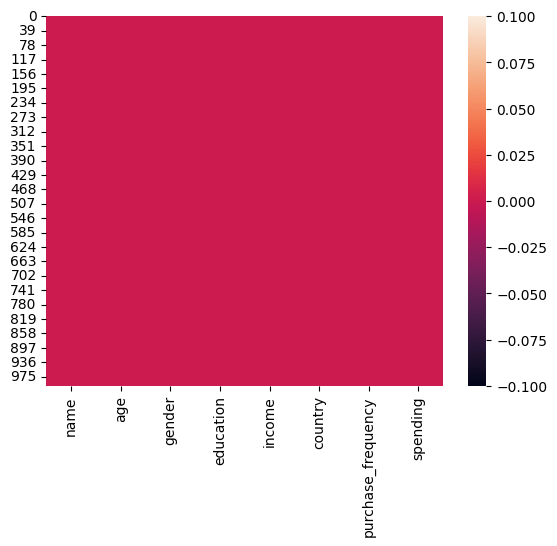

In [12]:
sns.heatmap(df.isnull())

In [13]:
px.pie(df, names='education', title='Education ratios')

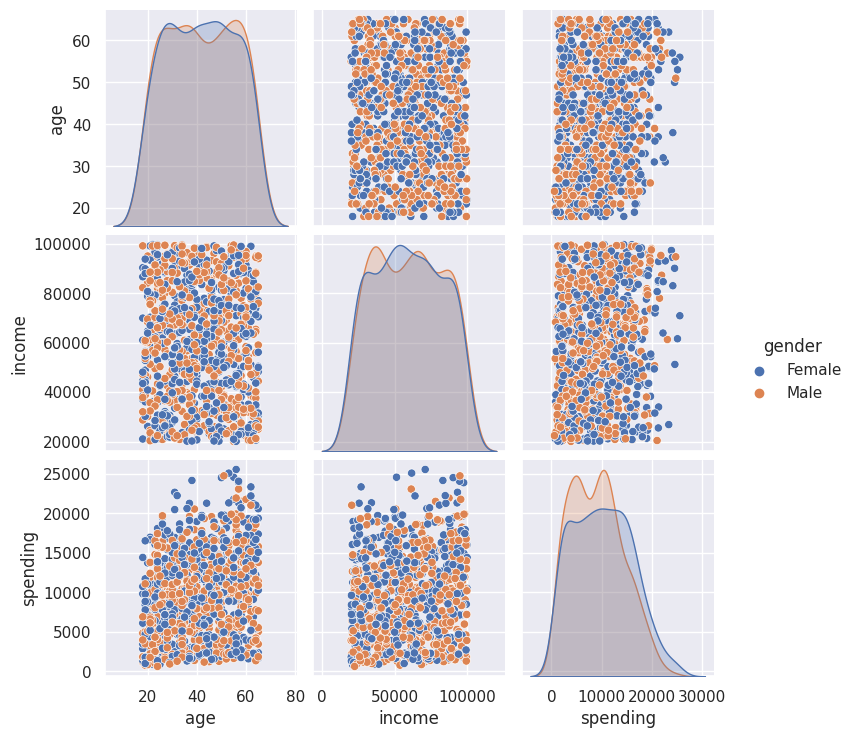

In [14]:
sns.set(rc = {"figure.figsize":(5,2.5)})

sns.pairplot(df, vars=['age','income','spending',],hue='gender',)

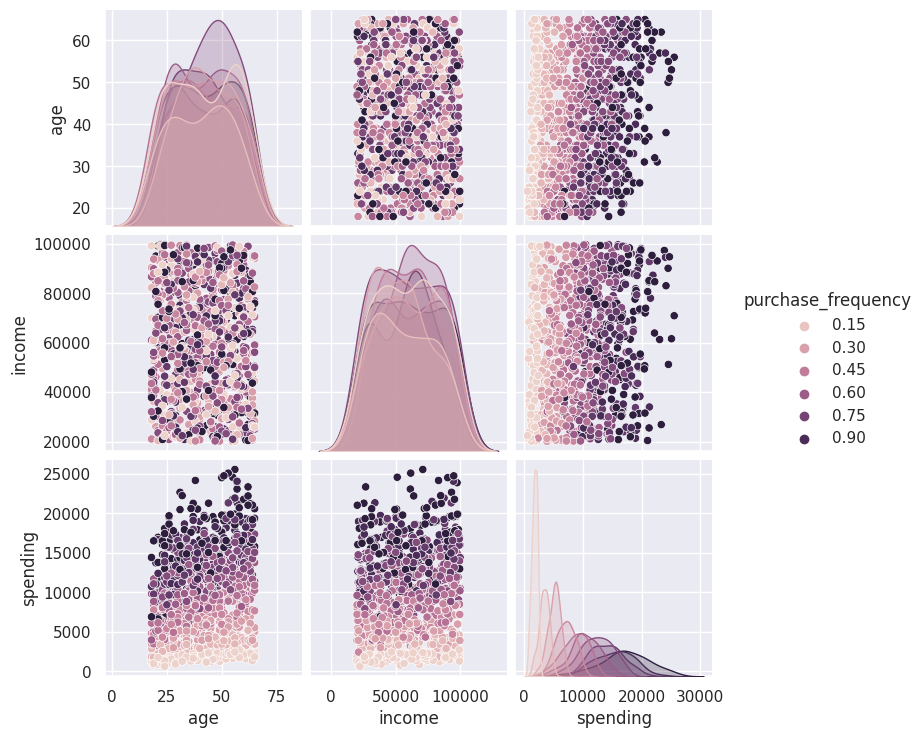

In [15]:
sns.pairplot(df , hue = 'purchase_frequency')

<Axes: xlabel='income', ylabel='age'>

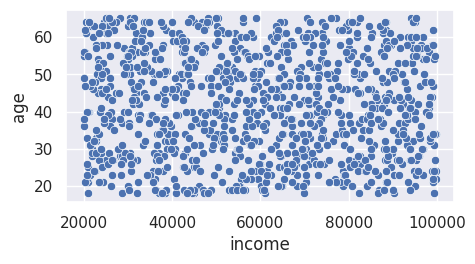

In [16]:
sns.scatterplot(data=df, x="income", y="age")

<Axes: xlabel='age', ylabel='spending'>

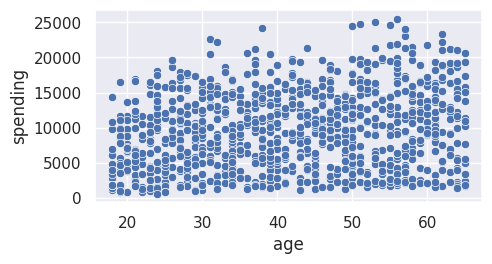

In [17]:
sns.scatterplot(data=df, x="age", y="spending")

<Axes: xlabel='income', ylabel='spending'>

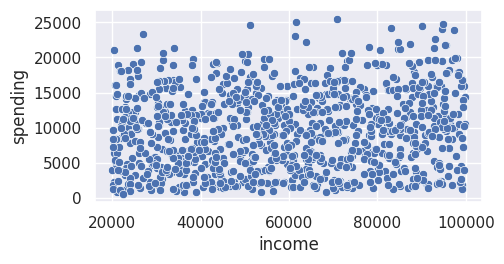

In [18]:
sns.scatterplot(data=df, x="income", y="spending")

Text(0.5, 1.0, 'Distribution of age')

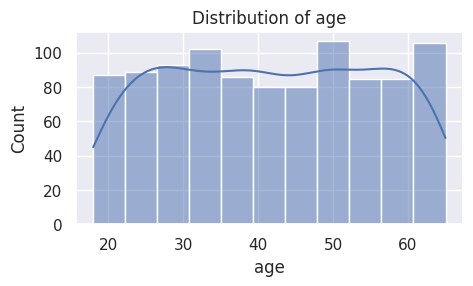

In [19]:
sns.histplot(df.age, kde=True)
plt.title("Distribution of age")

Text(0.5, 1.0, 'Distribution of income')

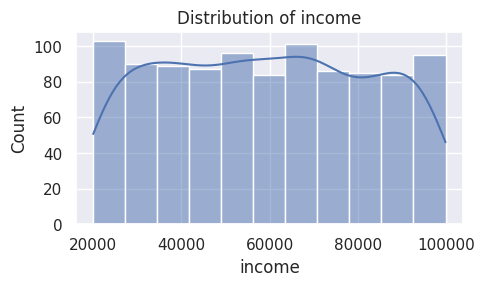

In [20]:
sns.histplot(df.income, kde=True)
plt.title("Distribution of income")

Text(0.5, 1.0, 'Distribution of Spending')

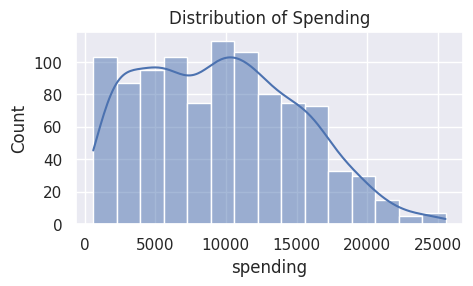

In [21]:
sns.histplot(df.spending, kde=True)
plt.title("Distribution of Spending")

# Data Preparation

In [22]:
X = df.drop(['name','country','gender','education','purchase_frequency'],axis=1)

In [23]:
X.head()

,age,income,spending
0,42,53936,13227.120
1,49,82468,12674.040
2,55,56941,5354.115
3,24,60651,2606.510
4,64,81884,18984.780


In [24]:
X.dtypes

age           int64
income        int64
spending    float64
dtype: object

In [25]:
X.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [26]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [27]:
standarized_data = scaler.transform(X)
print(standarized_data)

[[ 0.01786273 -0.22978925  0.6592205 ]
 [ 0.52615178  0.99756538  0.55832966]
 [ 0.96182812 -0.10052384 -0.77694449]
 ...
 [ 0.59876451  0.02280526 -0.44092533]
 [ 0.59876451 -0.04326851  0.78917392]
 [-0.27258816 -1.15138063 -0.23723191]]


# Modeling

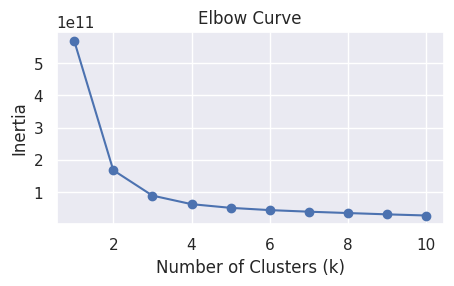

In [28]:
k_values = list(range(1, 11))
inertia_values = []

for best_k in k_values:
    kmeans = KMeans(n_clusters=best_k,init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=45)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve to find the optimal k value
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

In [29]:
best_k =3
kmeans = KMeans(n_clusters=best_k,init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=45).fit(X)
X["Cluster"] = kmeans.labels_

# Visualisasi Hasil Modeling

In [30]:
fig = px.scatter_3d(x=X["age"], y=X["income"], z=X["spending"], color=X["Cluster"])

fig.update_layout(
    title="K-means Clustering",
    scene=dict(
       xaxis_title="Age",
       yaxis_title="Income",
       zaxis_title="Spending",),)


In [31]:
print(X)

     age  income   spending  Cluster
0     42   53936  13227.120        1
1     49   82468  12674.040        2
2     55   56941   5354.115        1
3     24   60651   2606.510        1
4     64   81884  18984.780        2
..   ...     ...        ...      ...
995   42   98170  17435.950        2
996   39   59174  11662.830        1
997   50   59808   7196.160        1
998   50   58272  13939.520        1
999   38   32512   8312.800        0

[1000 rows x 4 columns]


In [32]:
X.to_excel("output.xlsx")